In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(3)
x1 = np.random.normal(0,0.1,1000)
x2 = x1*2 + np.random.normal(0,0.1,1000)

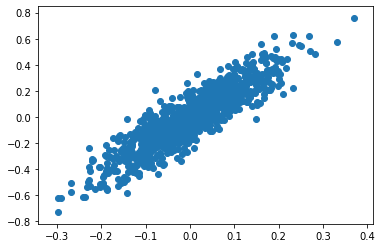

In [3]:
plt.scatter(x1,x2)

## a tall and narrow X is more natural to me

In [4]:
X = np.vstack((x1,x2)).T
print(X.shape)

(1000, 2)


## center X to X_bar and keep track of mean

In [5]:
X_mean = X.mean(axis=0)
X_bar = X - X_mean

In [6]:
print(X_mean)

[ 0.00172843 -0.00421337]


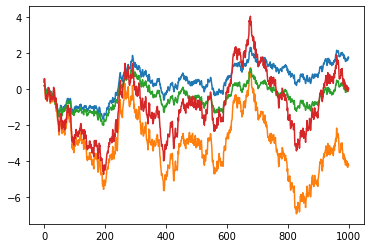

In [22]:
plt.plot(X[:,0].cumsum())
plt.plot(X[:,1].cumsum())
plt.plot(X_bar[:,0].cumsum())
plt.plot(X_bar[:,1].cumsum())

### using SVD

In [8]:
from numpy.linalg import svd

In [31]:
pca_loadings.shape

(2, 2)

In [9]:
U, s, Vh = svd(X_bar, full_matrices=False)
V = Vh.T
pca_factors = U @ np.diag(s)
pca_loadings = Vh

In [36]:
pca_factors

array([[ 0.40526654,  0.02565243],
       [ 0.20535346, -0.03867984],
       [-0.21188994,  0.09520278],
       ...,
       [ 0.00520819,  0.03355857],
       [ 0.25820936,  0.0610814 ],
       [-0.08904024, -0.01980855]])

In [35]:
Vh

array([[ 0.37849267,  0.92560429],
       [ 0.92560429, -0.37849267]])

# first component explains  97%, so keep only first

In [10]:
s**2 / (s**2).sum()

array([0.97261408, 0.02738592])

# unforfunately, first componet should be flipped

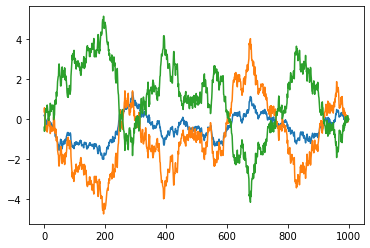

In [11]:
plt.plot(X_bar[:,0].cumsum())
plt.plot(X_bar[:,1].cumsum())
plt.plot(pca_factors[:,0].cumsum())

# let's flip first component

In [12]:
pca_factors[:, 0] = -pca_factors[:, 0]
pca_loadings[0, :] = -pca_loadings[0, :]

# double check if the flipped one can still replicate X_bar

In [13]:
np.allclose(pca_factors @ pca_loadings, X_bar)

True

## Draw again. Now PC1 looks ok.

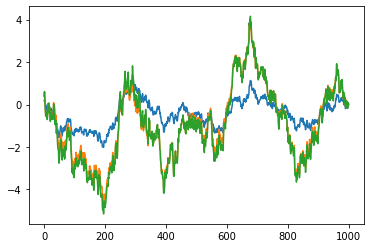

In [14]:
plt.plot(X_bar[:,0].cumsum())
plt.plot(X_bar[:,1].cumsum())
plt.plot(pca_factors[:,0].cumsum())

## Extend the first component

In [15]:
pc1 = pca_factors[:,0]
pc1_extension = np.array([0.5, -0.3, 0.4, -0.9, -0.8])
new_pc1 = np.concatenate([pc1, pc1_extension])

# Using new PC1 to approximate and extend the original time series

In [16]:
X_approx = new_pc1.reshape(-1,1) @ pca_loadings[0, :].reshape(1, -1) + X_mean

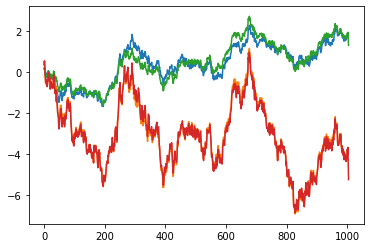

In [17]:
plt.plot(X[:,0].cumsum())
plt.plot(X[:,1].cumsum())
plt.plot(X_approx[:,0].cumsum())
plt.plot(X_approx[:,1].cumsum())